In [1]:
import random

import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader

from loc2vec.dataset import TilesDataset
from loc2vec.model import Loc2VecModel, SoftmaxTripletLoss, Loc2VecTripletLoss
from loc2vec.train import train

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
from loc2vec.memmap_tiles_dataset import MemmapTripletTilesDataset

dataset = MemmapTripletTilesDataset("../loc2vec/tiles/tiles_metadata_v2.csv", "../loc2vec/tiles/tiles-dataset-v2.npy", pos_radius=1, neg_radius_min=40, transform=T.Compose([
    T.Normalize([0.8107, 0.8611, 0.7814, 1, 1, 1],
                [0.1215, 0.0828, 0.1320, 1, 1, 1])
]))

test_dataset = MemmapTripletTilesDataset("../loc2vec/tiles/dataset-zhytomyr/metadata.csv", "../loc2vec/tiles/dataset-zhytomyr/zhytomyr.npy", pos_radius=1, neg_radius_min=40, transform=T.Compose([
    T.Normalize([0.8107, 0.8611, 0.7814, 1, 1, 1],
                [0.1215, 0.0828, 0.1320, 1, 1, 1])
]))


In [3]:
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4, prefetch_factor=4, persistent_workers=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=1, prefetch_factor=4, persistent_workers=True)

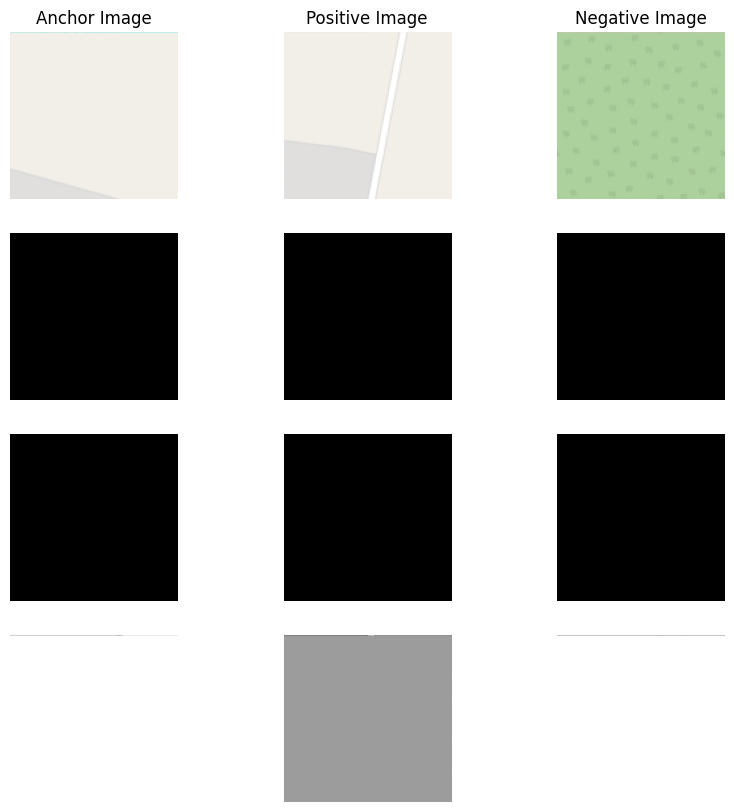

In [4]:
image = next(iter(test_loader))

denormalize = T.Normalize(
    mean=[-0.8107/0.1215, -0.8611/0.0828, -0.7814/0.1320],
    std=[1/0.1215, 1/0.0828, 1/0.1320]
)

# print(image['anchor_image'])

plt.figure(figsize=(10, 10))
plt.subplot(4, 3, 1)
plt.imshow(denormalize(image['anchor_image'][0][:3]).numpy().transpose(1, 2, 0))
plt.title("Anchor Image")
plt.axis('off')


plt.subplot(4, 3, 2)
plt.imshow(denormalize(image['pos_image'][0][:3]).numpy().transpose(1, 2, 0))
plt.title("Positive Image")
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(denormalize(image['neg_image'][0][:3]).numpy().transpose(1, 2, 0))
plt.title("Negative Image")
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(image['anchor_image'][0][4].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(image['pos_image'][0][4].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(image['neg_image'][0][4].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 7)
plt.imshow(image['anchor_image'][0][5].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(image['pos_image'][0][5].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(image['neg_image'][0][5].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(image['anchor_image'][0][3].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 11)
plt.imshow(image['pos_image'][0][3].numpy(), cmap='gray')
plt.axis('off')

plt.subplot(4, 3, 12)
plt.imshow(image['neg_image'][0][3].numpy(), cmap='gray')
plt.axis('off')

plt.show()

In [5]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = Loc2VecModel(input_channels=6, embedding_dim=16, dropout_rate=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = Loc2VecTripletLoss()

model.to(device)

print(f"Training on device: {device}")

Training on device: mps


In [6]:

train_losses_history = []
test_losses_history = []

for epoch in range(5):
    avg_loss, train_losses, test_losses = train(model, train_loader, test_loader, optimizer, loss_fn, device=device)

    train_losses_history.extend(train_losses)
    test_losses_history.extend(test_losses)

    torch.save(model.state_dict(), f"loc2vec_model_epoch_{epoch + 1}.pth")
    print(f"Epoch {epoch + 1}, Average Loss: {avg_loss:.4f}")

Training:  26%|██▌       | 5004/19333 [03:08<4:43:10,  1.19s/it]

Batch 5000, Train Loss: 0.2927, Test Loss: 0.2767


Training:  52%|█████▏    | 10004/19333 [06:15<3:27:38,  1.34s/it]

Batch 10000, Train Loss: 0.2463, Test Loss: 0.2583


Training:  78%|███████▊  | 15004/19333 [09:24<1:24:20,  1.17s/it]

Batch 15000, Train Loss: 0.2330, Test Loss: 0.2505


Training: 100%|██████████| 19333/19333 [11:51<00:00, 27.18it/s]  


Epoch 1, Average Loss: 0.2505


Training:  26%|██▌       | 5005/19333 [03:08<5:28:15,  1.37s/it]

Batch 5000, Train Loss: 0.2219, Test Loss: 0.2471


Training:  52%|█████▏    | 10004/19333 [06:16<2:51:55,  1.11s/it]

Batch 10000, Train Loss: 0.2188, Test Loss: 0.2408


Training:  78%|███████▊  | 15004/19333 [09:25<1:45:27,  1.46s/it]

Batch 15000, Train Loss: 0.2163, Test Loss: 0.2380


Training: 100%|██████████| 19333/19333 [11:53<00:00, 27.10it/s]  


Epoch 2, Average Loss: 0.2181


Training:  26%|██▌       | 5004/19333 [03:10<5:21:42,  1.35s/it]

Batch 5000, Train Loss: 0.2121, Test Loss: 0.2364


Training:  52%|█████▏    | 10004/19333 [06:20<3:39:39,  1.41s/it]

Batch 10000, Train Loss: 0.2094, Test Loss: 0.2398


Training:  78%|███████▊  | 15004/19333 [09:29<1:29:18,  1.24s/it]

Batch 15000, Train Loss: 0.2084, Test Loss: 0.2345


Training: 100%|██████████| 19333/19333 [11:57<00:00, 26.94it/s]  


Epoch 3, Average Loss: 0.2094


Training:  26%|██▌       | 5004/19333 [03:09<5:01:01,  1.26s/it]

Batch 5000, Train Loss: 0.2061, Test Loss: 0.2299


Training:  52%|█████▏    | 10004/19333 [06:18<3:27:52,  1.34s/it]

Batch 10000, Train Loss: 0.2053, Test Loss: 0.2370


Training:  78%|███████▊  | 15004/19333 [09:28<1:39:54,  1.38s/it]

Batch 15000, Train Loss: 0.2049, Test Loss: 0.2337


Training: 100%|██████████| 19333/19333 [11:57<00:00, 26.95it/s]  


Epoch 4, Average Loss: 0.2052


Training:  26%|██▌       | 5004/19333 [03:09<4:59:00,  1.25s/it]

Batch 5000, Train Loss: 0.2021, Test Loss: 0.2336


Training:  52%|█████▏    | 10004/19333 [06:19<3:28:06,  1.34s/it]

Batch 10000, Train Loss: 0.2018, Test Loss: 0.2292


Training:  78%|███████▊  | 15004/19333 [09:28<1:30:29,  1.25s/it]

Batch 15000, Train Loss: 0.2005, Test Loss: 0.2309


Training: 100%|██████████| 19333/19333 [11:55<00:00, 27.01it/s]  

Epoch 5, Average Loss: 0.2013


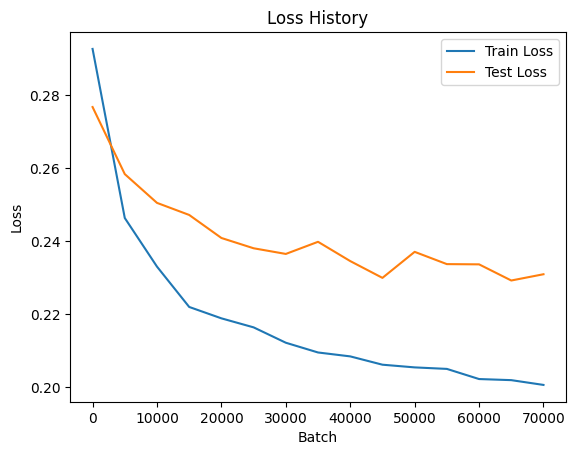

In [10]:

batches = range(0, len(train_losses_history * 5000), 5000)

plt.plot(batches, train_losses_history, label='Train Loss')
plt.plot(batches, test_losses_history, label='Test Loss')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()


In [ ]:
from loc2vec.embeddings import log_embeddings_to_tensorboard

log_embeddings_to_tensorboard(model, train_loader, device=device, log_dir="logs/embeddings", max_samples=5000)

Starting embedding extraction, max_samples=5000
Embeddings logged successfully!


In [ ]:
torch.save(model.state_dict(), "loc2vec_model_kyiv_region.pth")